In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import scipy.stats

In [49]:
data = pd.read_csv("airbnb_ratings_new.csv", encoding='latin1')

In [50]:
data

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,...,Number of reviews,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
0,13588243.0,Designer Urban Living - 2BR 1200sq,4386046.0,Chris,90%,False,3.0,Lau Li Street| 0| Hong Kong Island 0| Hong Kong,0,Wan Chai,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5534229.0,A 2 Passi da San Pietro,28697142.0,Veronica,100%,False,5.0,00165| Rm 00165| Italy,165,XIII Aurelia,...,2.0,8/29/15,90,9.0,10.0,8.0,8.0,9.0,9.0,0.08
2,18417052.0,Appartement prs mtro Simonis,81453949.0,Kristina,100%,False,2.0,1081| Koekelberg 1081| Belgium,1081,Koekelberg,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5903406.0,cosy small apartment,1853799.0,Veronika,88%,False,2.0,1190| Wien| Austria,1190,Dbling,...,3.0,9/9/17,87,9.0,10.0,10.0,10.0,10.0,8.0,0.27
4,5203533.0,Rummelig lejl i hjertet af KBH,24801534.0,Marianne,100%,False,1.0,Indre By| 1366| Danmark K¿benhavn K| Denmark,1366,Indre By,...,6.0,7/26/16,100,10.0,10.0,10.0,10.0,10.0,10.0,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9563852.0,CHARMING STUDIO IN BARBES; NEAR MONTMARTRE,17267346.0,Laura,90%,False,1.0,ële-de-France| ële-de-France| France,NaN,Buttes-Montmartre,...,22.0,3/10/17,96,10.0,9.0,10.0,10.0,9.0,9.0,1.42
1048571,5841088.0,Bright 1Bedroom Apartment & Rooftop,7260061.0,Diana,100%,False,1.0,| NSW 2026| Australia,NaN,Waverley,...,7.0,1/1/17,97,10.0,9.0,9.0,10.0,10.0,9.0,0.29
1048572,17876657.0,Quiet Apartment close to Place d'Italie,121920402.0,Gabriel,100%,False,8.0,ële-de-France| ële-de-France 75013| France,NaN,Gobelins,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,12157261.0,Chambre douillette; appart lumineux; rue St-Jean,65286315.0,Catherine,50%,False,1.0,Qubec| Qubec| Canada,NaN,Saint-Jean-Baptiste,...,41.0,6/18/17,94,9.0,9.0,10.0,10.0,10.0,9.0,2.82


In [51]:
# df_final.duplicated() 메서드를 사용하면 모든 컬럼의 값이 동일한 경우를 중복으로 간주
duplicate_rows = data[data.duplicated()]

# 중복된 행 출력
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
        Listing ID Name  Host ID Host Name Host Response Rate  \
298638         NaN  NaN      NaN       NaN                NaN   
298639         NaN  NaN      NaN       NaN                NaN   
298640         NaN  NaN      NaN       NaN                NaN   
298641         NaN  NaN      NaN       NaN                NaN   
298642         NaN  NaN      NaN       NaN                NaN   
...            ...  ...      ...       ...                ...   
826769         NaN  NaN      NaN       NaN                NaN   
826770         NaN  NaN      NaN       NaN                NaN   
826771         NaN  NaN      NaN       NaN                NaN   
826772         NaN  NaN      NaN       NaN                NaN   
826773         NaN  NaN      NaN       NaN                NaN   

       Host Is Superhost  Host total listings count Street       City  \
298638               NaN                        NaN    NaN  Manhattan   
298639               NaN         

In [52]:
df_final = data.drop_duplicates()
print(df_final)

         Listing ID                                              Name  \
0        13588243.0                Designer Urban Living - 2BR 1200sq   
1         5534229.0                           A 2 Passi da San Pietro   
2        18417052.0                    Appartement prs mtro Simonis   
3         5903406.0                              cosy small apartment   
4         5203533.0                    Rummelig lejl i hjertet af KBH   
...             ...                                               ...   
1048570   9563852.0        CHARMING STUDIO IN BARBES; NEAR MONTMARTRE   
1048571   5841088.0               Bright 1Bedroom Apartment & Rooftop   
1048572  17876657.0           Quiet Apartment close to Place d'Italie   
1048573  12157261.0  Chambre douillette; appart lumineux; rue St-Jean   
1048574  11225183.0               Hollywood Pool Home w/ Pool House!!   

             Host ID  Host Name Host Response Rate Host Is Superhost  \
0          4386046.0      Chris                90% 

In [53]:
#taget값인 Price 그래프 확인

<Axes: xlabel='Price', ylabel='Density'>

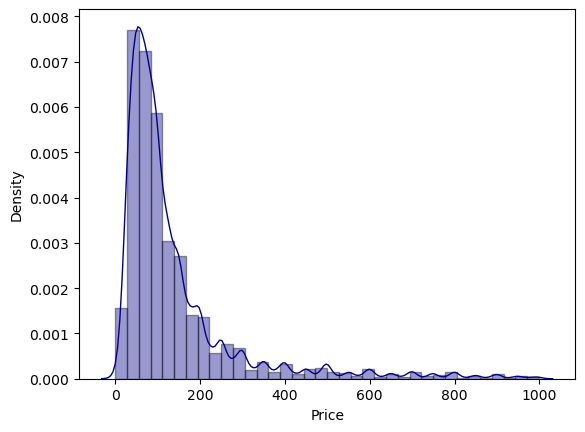

In [54]:
sns.distplot(df_final['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

<Axes: xlabel='Price', ylabel='Density'>

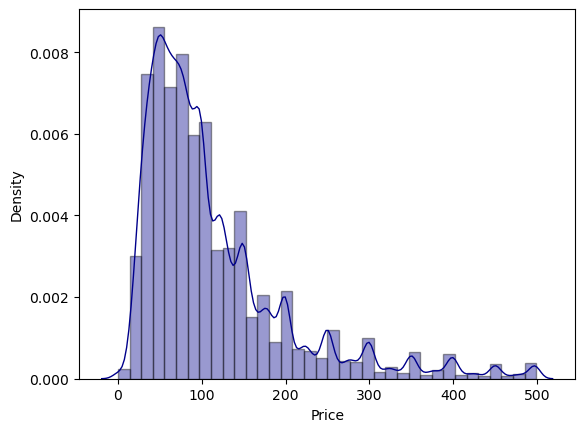

In [55]:
PriceFilteredData = df_final[df_final['Price'] < 500]

# Density Plot and Histogram of variable "Price"
sns.distplot(PriceFilteredData['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

<Axes: xlabel='Price', ylabel='Density'>

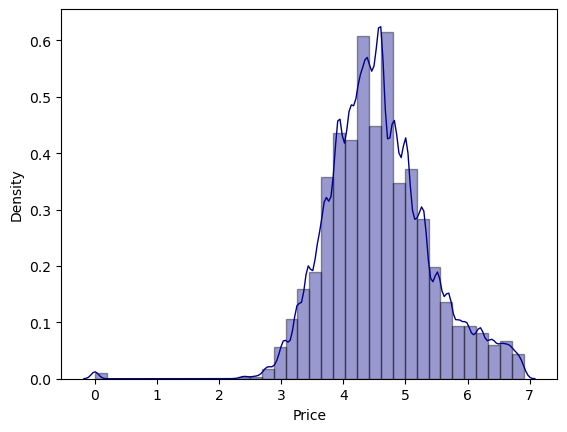

In [56]:
# log 변환
df_final
df_final['Price'] = np.log1p(df_final['Price'])
sns.distplot(df_final['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

In [57]:
#컬럼간 상관관계 알아보기 pearson

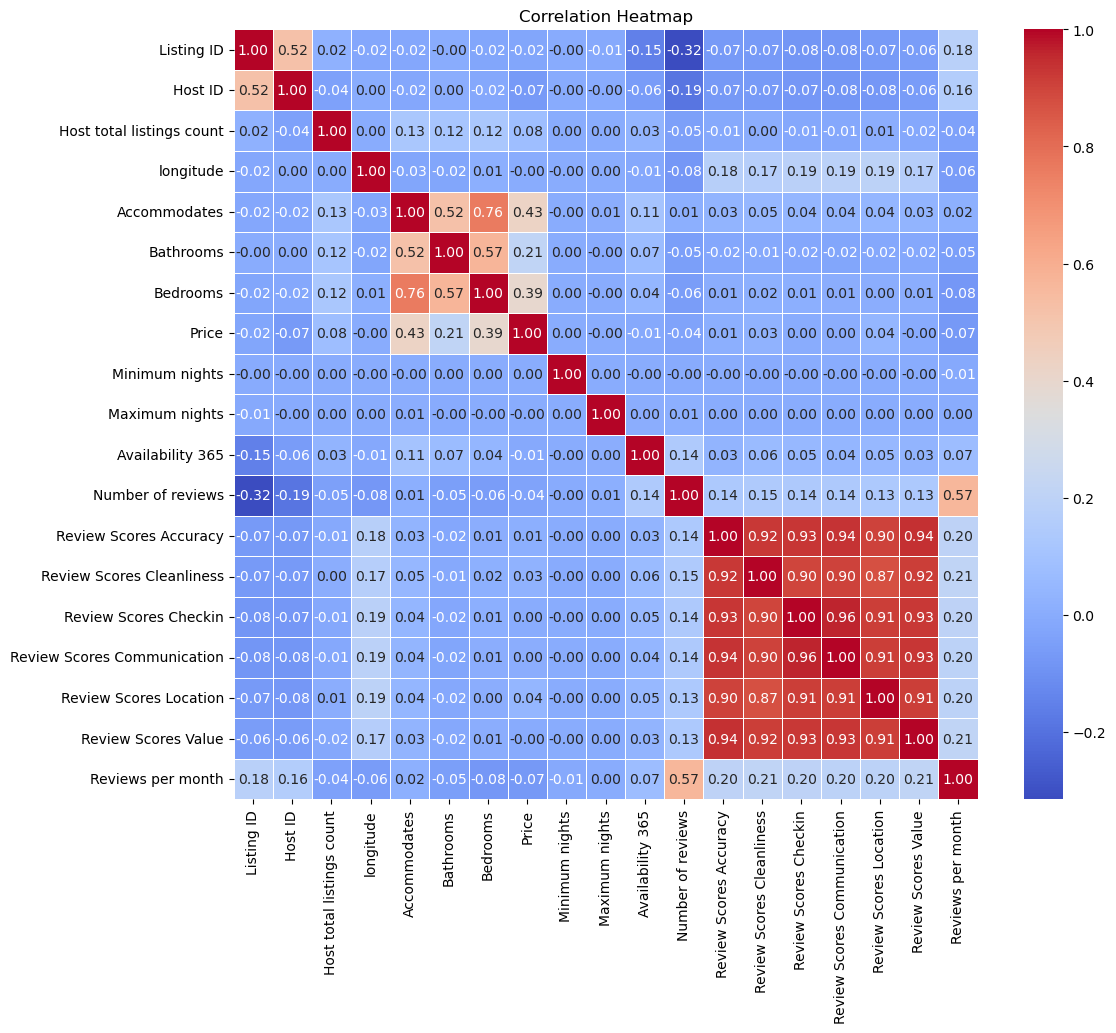

In [58]:
correlation_matrix = df_final.corr(method='pearson')

# Heatmap 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [59]:
#컬럼간 상관관계 알아보기 spearman

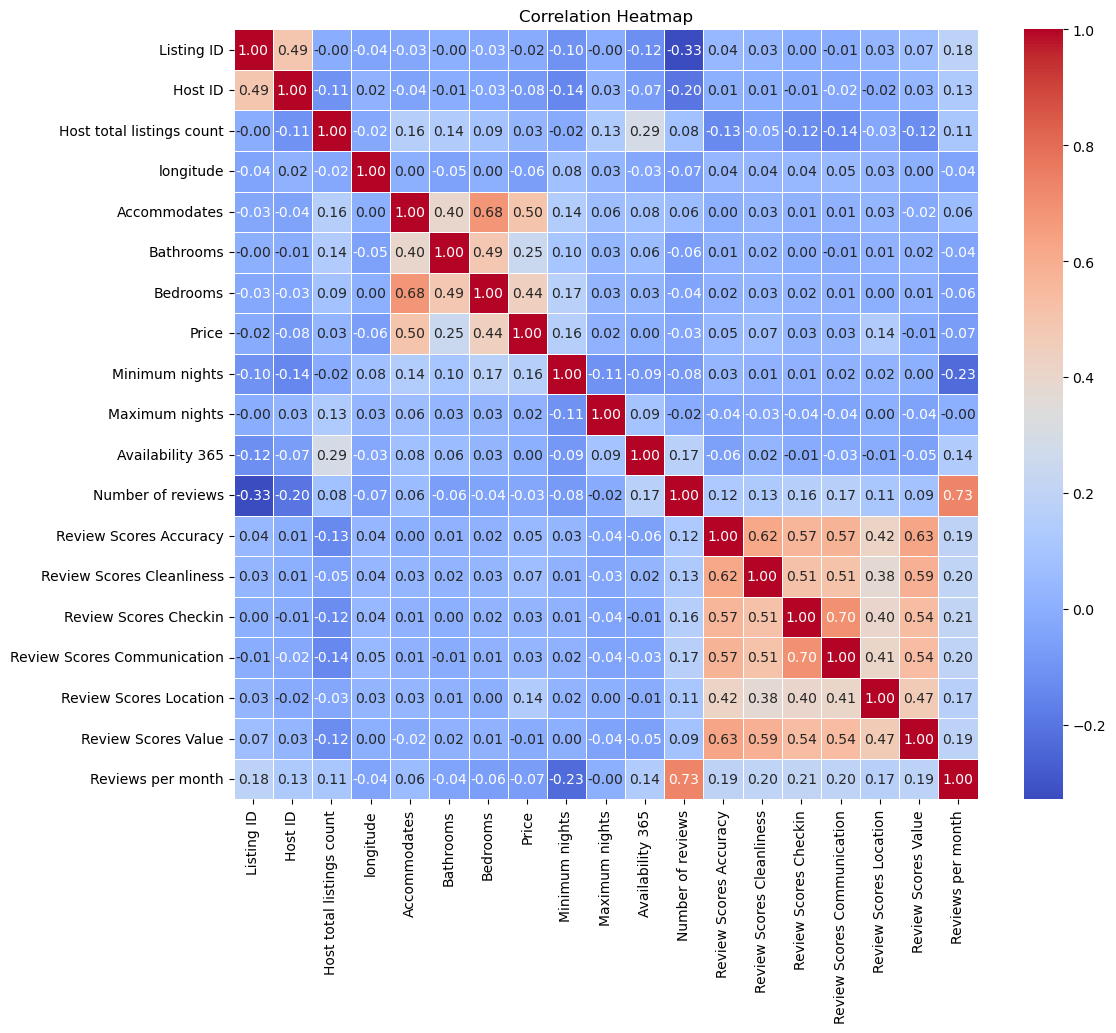

In [60]:
correlation_matrix = df_final.corr(method='spearman')

# Heatmap 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
# Price와 상관관계가 있다고 직관적으로 판단되는 얘들은 Accommodates,Bathrooms, Bedrooms 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [63]:
#결측치 제거 NA행 전부 제거

In [64]:
df_final.dropna(axis=0, how='any', inplace=True)

In [65]:
df_final.describe

<bound method NDFrame.describe of          Listing ID                                               Name  \
1         5534229.0                            A 2 Passi da San Pietro   
3         5903406.0                               cosy small apartment   
4         5203533.0                     Rummelig lejl i hjertet af KBH   
6         8858475.0    Modern; spacious and warm; with its own balcony   
7         4215511.0                  Nice room; Bohemian Cph; N¿rrebro   
...             ...                                                ...   
1048168   8721576.0  2 bedroom- Spacious Apartment with Private Par...   
1048193  10920578.0                Rooms per month@Home Away From Home   
1048236  11889896.0                      Room near CalArts & Six Flags   
1048357  12658726.0                 BRAND NEW-Light & Beautiful Studio   
1048574  11225183.0                Hollywood Pool Home w/ Pool House!!   

            Host ID Host Name Host Response Rate Host Is Superhost  \
1      

In [66]:
#범주형 변수 확인

In [67]:
features=['Country', 'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms']
# 각 열의 데이터 타입 확인
for column in features:
    data_type = df_final[column].dtype
    print(data_type)

object
object
object
float64
float64
float64


In [68]:
#country와 Property type가 변수형 타입, onehot encoding

In [69]:
df_final.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude', 'longitude',
       'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month'],
      dtype='object')

In [70]:
df_final = pd.get_dummies(df_final, columns=['Country', 'Property type','Room type'], drop_first=True)

In [71]:
df_final.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'latitude', 'longitude',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Amenities', 'Price',
       'Minimum nights', 'Maximum nights', 'Availability 365',
       'Calendar last scraped', 'Number of reviews', 'Last Review Date',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month', 'Country_Austria',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Greece',
       'Country_Hong Kong', 'Country_Ireland', 'Country_Italy',
       'Country_Mexico', 'Country_Netherlands', 'Country_Spain',
       'Country_Switzerland', 'Country_United Kingdom'

In [72]:
features=['Country', 'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms']


In [73]:
features = [
       'Accommodates', 'Bathrooms', 'Bedrooms',
       'Country_Austria', 'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Greece',
       'Country_Hong Kong', 'Country_Ireland', 'Country_Italy',
       'Country_Mexico', 'Country_Netherlands', 'Country_Spain',
       'Country_Switzerland', 'Country_United Kingdom',
       'Country_United States', 'Country_Vatican City',
       'Property type_Bed & Breakfast', 'Property type_Boat',
       'Property type_Boutique hotel', 'Property type_Bungalow',
       'Property type_Cabin', 'Property type_Camper/RV',
       'Property type_Casa particular', 'Property type_Castle',
       'Property type_Cave', 'Property type_Chalet',
       'Property type_Condominium', 'Property type_Dorm',
       'Property type_Earth House', 'Property type_Entire Floor',
       'Property type_Guest suite', 'Property type_Guesthouse',
       'Property type_Hostel', 'Property type_House', 'Property type_Hut',
       'Property type_Igloo', 'Property type_In-law', 'Property type_Island',
       'Property type_Lighthouse', 'Property type_Loft',
       'Property type_Nature lodge', 'Property type_Other',
       'Property type_Plane', 'Property type_Ryokan (Japan)',
       'Property type_Serviced apartment', 'Property type_Tent',
       'Property type_Timeshare', 'Property type_Tipi',
       'Property type_Townhouse', 'Property type_Train',
       'Property type_Treehouse', 'Property type_Vacation home',
       'Property type_Villa', 'Property type_Yurt', 'Room type_Private room',
       'Room type_Shared room']
target = 'Price'

X = df_final[features]
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# LinearRegression 모델 생성
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

R-squared: 0.6216597664408188
MAE: 0.3282827460521865
RMSE: 0.4575976683096932


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# R-squared
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf}")

# MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest R-squared: 0.6244326099415329
Random Forest MAE: 0.3320914746445636
Random Forest RMSE: 0.4559177252312343


In [75]:
from catboost import CatBoostRegressor

# CatBoost 모델 생성
catboost_model = CatBoostRegressor(iterations=100, random_seed=42, verbose=0)

# 모델 훈련
catboost_model.fit(X_train, y_train)

# 예측
y_pred_catboost = catboost_model.predict(X_test)

# R-squared
r2_catboost = r2_score(y_test, y_pred_catboost)
print(f"CatBoost R-squared: {r2_catboost}")

# MAE
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
print(f"CatBoost MAE: {mae_catboost}")

# RMSE
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
print(f"CatBoost RMSE: {rmse_catboost}")

CatBoost R-squared: 0.6637284741922699
CatBoost MAE: 0.3142819033834659
CatBoost RMSE: 0.43140739594542976


In [76]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV

# CatBoost 모델 생성
catboost_model = CatBoostRegressor(random_seed=42, verbose=0)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
}

# GridSearchCV를 사용하여 하이퍼파라미터 탐색
grid_search = GridSearchCV(catboost_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best_catboost = best_model.predict(X_test)

# R-squared
r2_best_catboost = r2_score(y_test, y_pred_best_catboost)
print(f"Best CatBoost R-squared: {r2_best_catboost}")

# MAE
mae_best_catboost = mean_absolute_error(y_test, y_pred_best_catboost)
print(f"Best CatBoost MAE: {mae_best_catboost}")

# RMSE
rmse_best_catboost = np.sqrt(mean_squared_error(y_test, y_pred_best_catboost))
print(f"Best CatBoost RMSE: {rmse_best_catboost}")

Best Hyperparameters: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
Best CatBoost R-squared: 0.6644919308549733
Best CatBoost MAE: 0.31421414747290216
Best CatBoost RMSE: 0.43091739310585553


In [86]:
# 로그를 취한 값을 역변환하여 실제 값으로 변환
predicted_values = np.exp(y_pred_best_catboost)
exp_yest =np.exp(y_test)

# 실제 값과 비교
compare_df = pd.DataFrame({'Actual': exp_yest, 'Predicted': predicted_values})
print(compare_df)

# R-squared
r2_best_catboost = r2_score(exp_yest, predicted_values)
print(f"Best CatBoost R-squared: {r2_best_catboost}")

# MAE
mae_best_catboost = mean_absolute_error(exp_yest, predicted_values)
print(f"Best CatBoost MAE: {mae_best_catboost}")

# RMSE
rmse_best_catboost = np.sqrt(mean_squared_error(exp_yest, predicted_values))
print(f"Best CatBoost RMSE: {rmse_best_catboost}")

        Actual   Predicted
957113    61.0   76.297046
70324     46.0   38.064193
122538    56.0   84.304819
135776   141.0  146.935316
255078   111.0  127.518034
...        ...         ...
836242    34.0   54.899675
868746    41.0   49.243093
279560   226.0  130.245363
846885   301.0  140.303600
887930    46.0   39.883330

[59215 rows x 2 columns]
Best CatBoost R-squared: 0.6497977134174013
Best CatBoost MAE: 39.70844333899144
Best CatBoost RMSE: 73.13709812270592
